Load a random vector with the divide-and-conquer state preparation.

In [6]:
import numpy as np
from encoding import Encoding
from qiskit import Aer, ClassicalRegister, execute, visualization

In [10]:
# input_vector = range(1, 17)
input_vector = 2*np.random.rand(8)-1

input_vector = input_vector / np.linalg.norm(input_vector)
expected_probabilities = input_vector ** 2
print((input_vector))

[-0.28344396 -0.31310618 -0.76545773  0.08420483  0.14863077 -0.24228608
 -0.38441373  0.00636325]


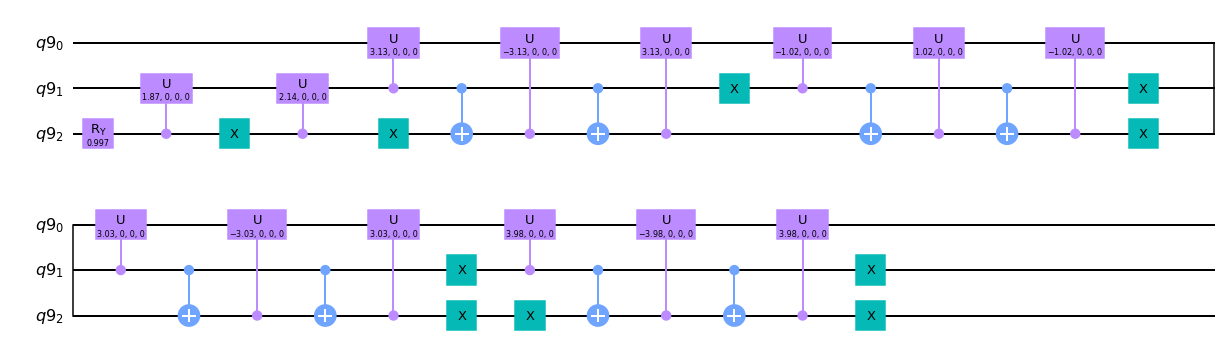

In [11]:
encode = Encoding(input_vector, 'amplitude_encoding')
# output = ClassicalRegister(len(encode.output_qubits))
# encode.qcircuit.add_register(output)
# encode.qcircuit.barrier()


# for k, value in enumerate(reversed(encode.output_qubits)):
#     encode.qcircuit.measure(encode.quantum_data[value], output[k])
    
encode.qcircuit.draw('mpl')
# visualization.circuit_drawer(encode.qcircuit, filename="circuit", output='mpl', style={'backgroundcolor': '#EEEEEE'})

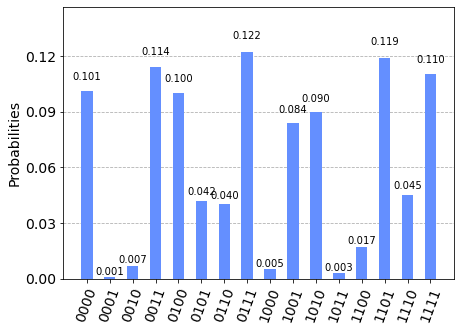

In [4]:
circuit = encode.qcircuit
backend_sim = Aer.get_backend('qasm_simulator')
shots = 1000
job = execute(circuit, backend_sim, shots = shots)
results = job.result()
counts = results.get_counts()
visualization.plot_histogram(counts)

In [5]:
expected_probabilities

array([0.1210811 , 0.00352124, 0.01119679, 0.10411438, 0.10219451,
       0.03763963, 0.05074582, 0.10936027, 0.00445617, 0.07094581,
       0.10861895, 0.00142763, 0.0203487 , 0.10439658, 0.0489563 ,
       0.10099613])